In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In this ML project,I have collected dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) .This project is used to predict whether any person is suffering from heart disease.


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Iam going to use, 
1.  KNeighborsClassifier
2.   DecisionTreeClassifier
3.RandomForestClassifier
4.Logistic Regression
5.Artificial Neural Network






In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Feature Selection**

In [ ]:
#Correlation between the features
corrmat=df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**Let we plot the Correlation**

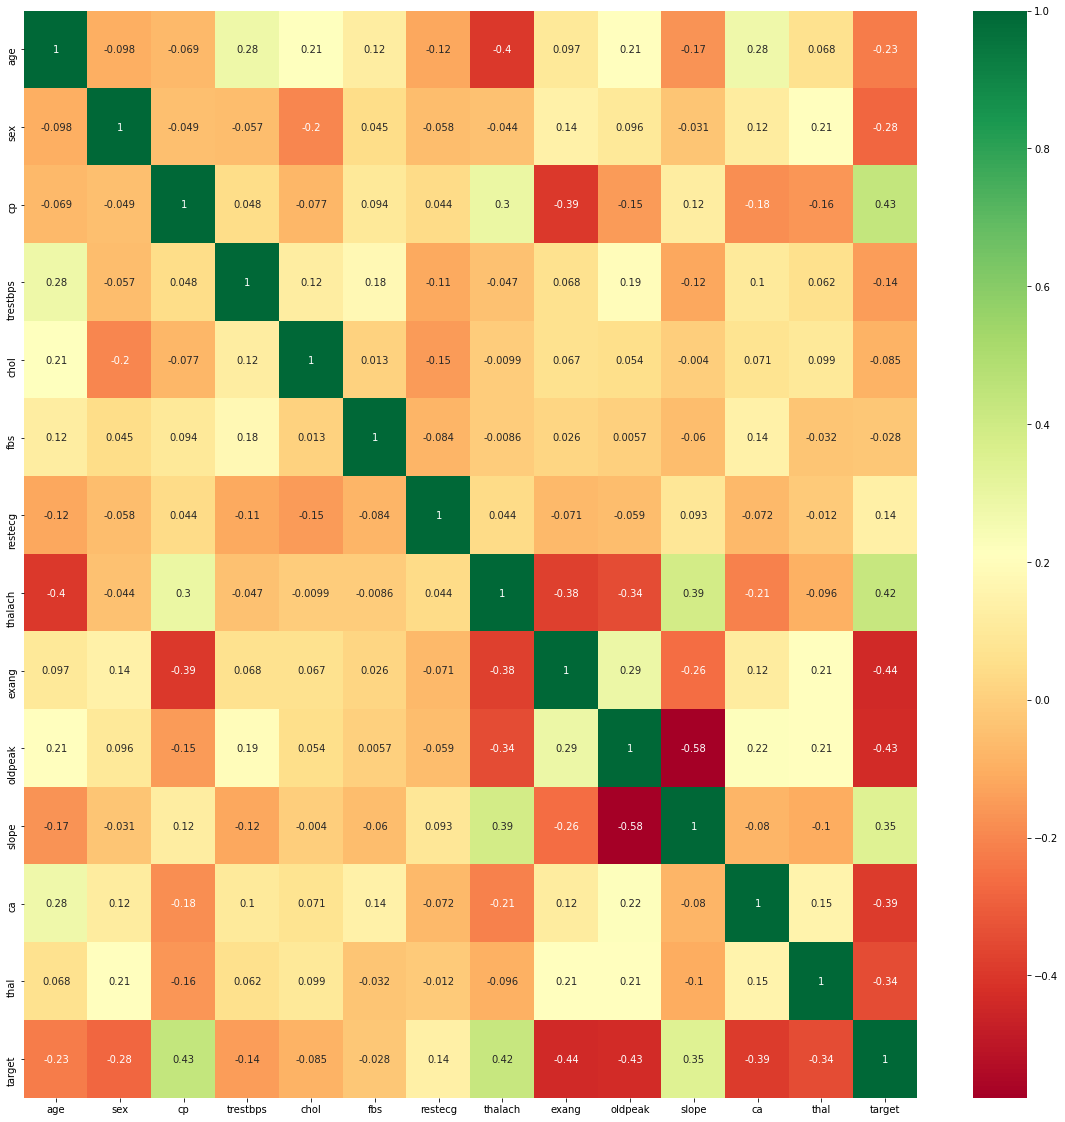

In [ ]:
top_features=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True,cmap="RdYlGn")

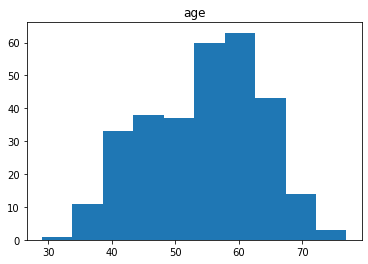

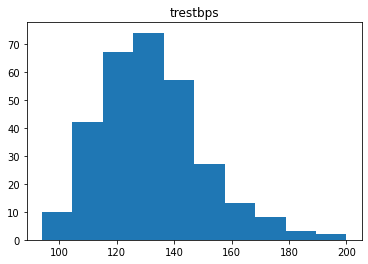

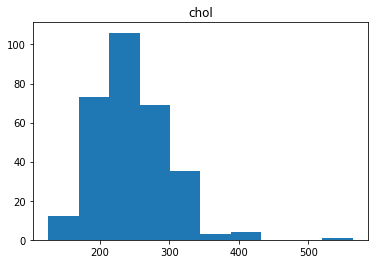

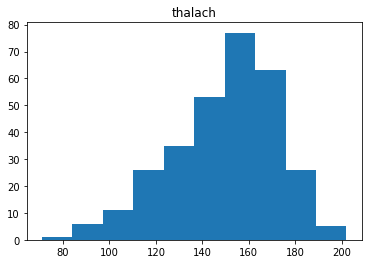

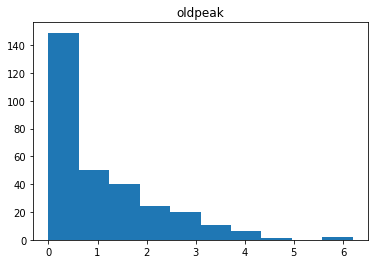

In [ ]:
continous_var=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var in continous_var:
  plt.hist(df[var],bins=10)
  plt.title(var)
  plt.show()

**Checking the dataset is balanced or not**

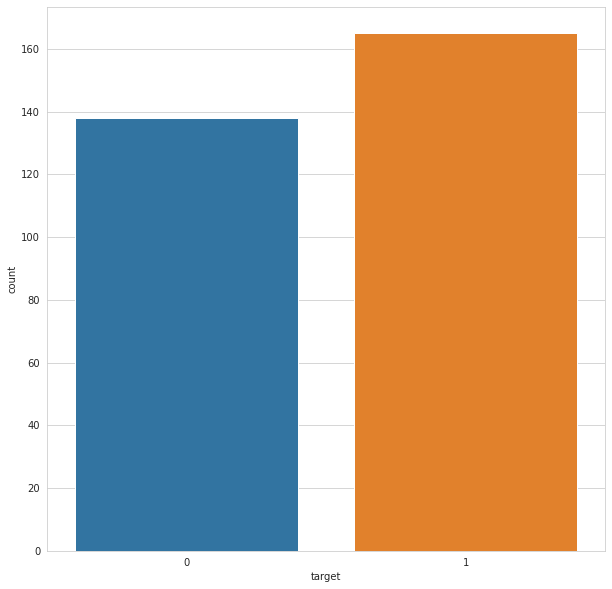

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.countplot(x='target',data=df)

**We can say it is a balanced dataset**

In [ ]:
categorical_var=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataset=pd.get_dummies(df,columns=categorical_var)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
dataset[continous_var]=sc.fit_transform(dataset[continous_var])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
X=dataset.drop(['target'],axis=1)
y=dataset['target']

# K-NearestNeighbour

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for i in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=i)
  scores=cross_val_score(knn,X,y,cv=10)
  knn_scores.append(scores.mean())

Text(0.5, 1.0, 'K-Nearest Neighbour classifier for K values')

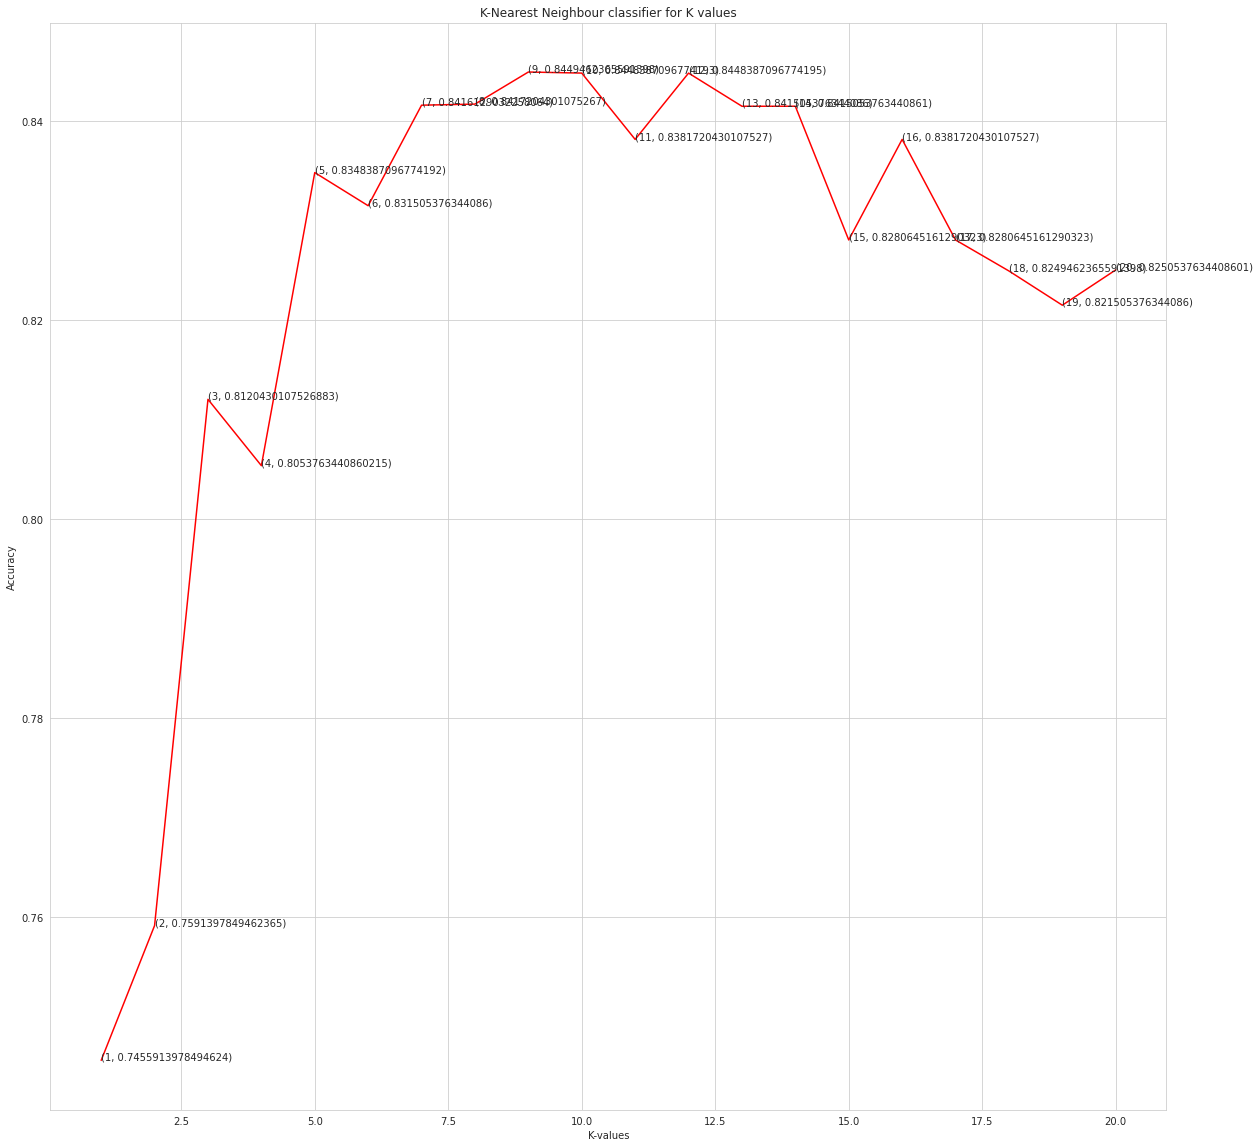

In [ ]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1,21)],knn_scores,color='red')
for i in range(1,21):
  plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbour classifier for K values')

In [ ]:
knn_classifier=KNeighborsClassifier(n_neighbors=13)
knn_score=cross_val_score(knn_classifier,X,y,cv=10)
knn_score.mean()

0.841505376344086

In [ ]:
all_scores={}
all_scores['KNN']=knn_score.mean()

# RandomForest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
parameters={'n_estimators':[1, 2, 4, 8,10,16, 32, 64, 100, 200],'max_depth':list(np.linspace(1,20,20,endpoint=True))}
clf=GridSearchCV(rf,parameters)
clf.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
clf.best_params_

{'max_depth': 20.0, 'n_estimators': 100}

In [ ]:
clf.best_score_

0.8546994535519126

In [ ]:
rf=RandomForestClassifier(n_estimators=100,max_depth=20)
rf_score=cross_val_score(rf,X,y,cv=10)
rf_score.mean()

0.8412903225806451

In [ ]:
all_scores['RFC']=rf_score.mean()

# Decision Tree

In [ ]:
dt=DecisionTreeClassifier(random_state=1)
parameters={'max_depth':list(np.linspace(1,20,20,endpoint=True)),'criterion':['gini','entropy']}
clf_dt=GridSearchCV(dt,parameters,cv=10)
clf_dt.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0

In [ ]:
clf_dt.best_params_

{'criterion': 'gini', 'max_depth': 3.0}

In [ ]:
dt=DecisionTreeClassifier(random_state=1,max_depth=3)
score_dt=cross_val_score(dt,X,y,cv=10)
score_dt.mean()

0.7850537634408602

In [ ]:
all_scores['DTC']=score_dt.mean()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(random_state=1)

In [ ]:
score_lr=cross_val_score(lr,X,y,cv=10)
score_lr.mean()

0.8511827956989247

In [ ]:
all_scores['LR']=score_lr.mean()

# Artificial Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16,kernel_initializer='random_normal',input_dim=30,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32,kernel_initializer='random_normal',activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer='random_normal'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test))

Epoch 1/30
7/7 [==============================] - 0s 12ms/step - loss: 0.3586 - accuracy: 0.8424 - val_loss: 0.3588 - val_accuracy: 0.8700
Epoch 2/30
7/7 [==============================] - 0s 12ms/step - loss: 0.3666 - accuracy: 0.8522 - val_loss: 0.3631 - val_accuracy: 0.8700
Epoch 3/30
7/7 [==============================] - 0s 12ms/step - loss: 0.3462 - accuracy: 0.8768 - val_loss: 0.3535 - val_accuracy: 0.8500
Epoch 4/30
7/7 [==============================] - 0s 12ms/step - loss: 0.3450 - accuracy: 0.8621 - val_loss: 0.3430 - val_accuracy: 0.8500
Epoch 5/30
7/7 [==============================] - 0s 12ms/step - loss: 0.3528 - accuracy: 0.8621 - val_loss: 0.3420 - val_accuracy: 0.8500
Epoch 6/30
7/7 [==============================] - 0s 11ms/step - loss: 0.3665 - accuracy: 0.8621 - val_loss: 0.3467 - val_accuracy: 0.8500
Epoch 7/30
7/7 [==============================] - 0s 11ms/step - loss: 0.3440 - accuracy: 0.8571 - val_loss: 0.3474 - val_accuracy: 0.8500
Epoch 8/30
7/7 [===========

In [ ]:
ann_acc=model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8800


In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,y_pred)
cr=classification_report(Y_test,y_pred)
print(cm)
print(cr)

[[35  7]
 [ 5 53]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.88      0.91      0.90        58

    accuracy                           0.88       100
   macro avg       0.88      0.87      0.88       100
weighted avg       0.88      0.88      0.88       100



In [ ]:
all_scores['ANN']=ann_acc[1]


{'ANN': 0.8799999952316284,
 'DTC': 0.7850537634408602,
 'KNN': 0.841505376344086,
 'LR': 0.8511827956989247,
 'RFC': 0.8412903225806451}

# Plotting Accuracies

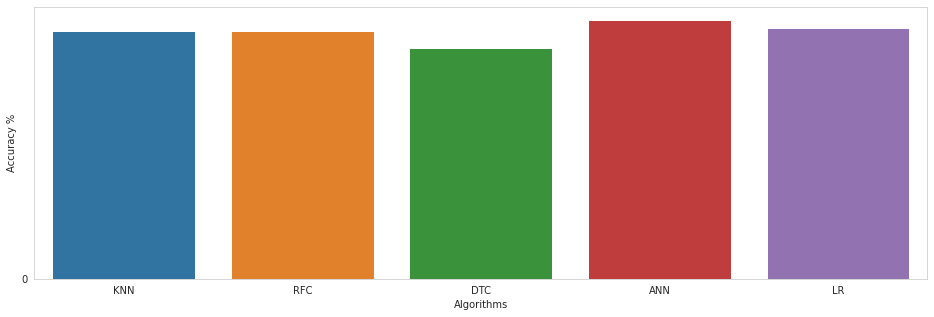

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy %')
sns.barplot(x=list(all_scores.keys()),y=list(all_scores.values()))
plt.show()